In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv('HouseData.csv')

In [45]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [46]:
df.shape

(13320, 9)

In [47]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [48]:
df1 = df.drop(['area_type','availability','society','balcony'], axis = 1)

In [49]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [50]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [51]:
df1.dropna(inplace = True)

In [52]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [53]:
df1['BHK'] = df1['size'].apply(lambda x: int(x.split()[0]))

In [54]:
df1.drop(['size'], axis = 1, inplace = True)

In [55]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [56]:
def convert_to_float(x):
    if is_float(x):
        return float(x)
    else:
        try:
            return (float(x.split('-')[0]) + float(x.split('-')[1]))/2
        except:
            return None

In [57]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_to_float)

In [58]:
location_stats = df1.location.apply(lambda x: x.strip()).value_counts()

In [59]:
location_stats_less_than_10 = location_stats[location_stats < 10]

In [60]:
df1.location = df1.location.apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)

In [61]:
df1['price_per_sqft'] = round(df1['price']*100000/df1['total_sqft'],2)

In [62]:
df1.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


In [63]:
df1[df1['total_sqft']/df1['BHK'] < 300].head()

,location,total_sqft,bath,price,BHK,price_per_sqft
9,Other,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.30
70,Other,500.0,3.0,100.0,3,20000.00


In [64]:
df2 = df1[~(df1['total_sqft']/df1['BHK'] < 300)]

In [65]:
df2.price_per_sqft.describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [66]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        
        red_df = subdf[(subdf.price_per_sqft >= m-sd) & (subdf.price_per_sqft <= m+sd)]
        df_out = pd.concat([df_out, red_df], ignore_index = True)
    return df_out

In [67]:
df2.shape

(12502, 6)

In [68]:
df3 = remove_pps_outliers(df2)
df3.shape

(10212, 6)

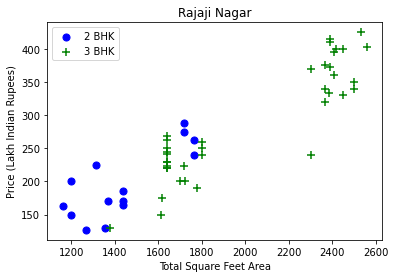

In [69]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    #matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Rajaji Nagar")

In [80]:
def remove_bhk_outliers(df):
    exclude_ind = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]                
            }
        
        for bhk, bhk_df in location_df.groupby('BHK'):
            prev_bhk = bhk_stats.get(bhk-1)
            if prev_bhk and prev_bhk['count'] > 5:
                exclude_ind = np.append(exclude_ind, bhk_df[bhk_df.price_per_sqft < prev_bhk['mean']].index.values)
        
    return df.drop(exclude_ind, axis = 'index')
            

In [81]:
df4 = remove_bhk_outliers(df3)
df4.shape

(7397, 6)

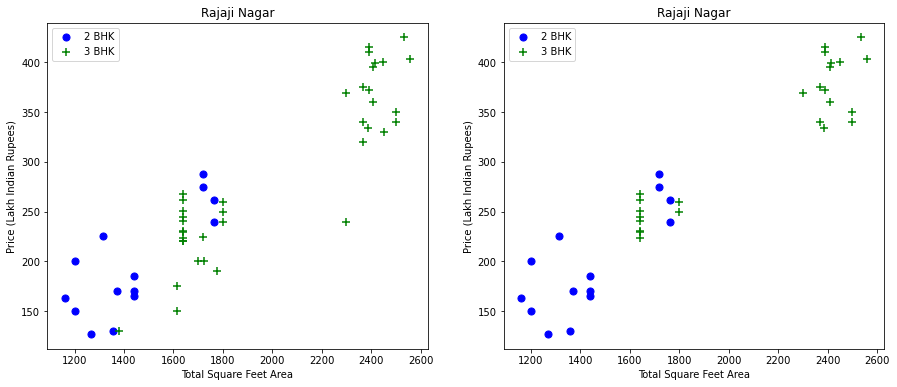

In [91]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plot_scatter_chart(df3,"Rajaji Nagar")
plt.subplot(1,2,2)
plot_scatter_chart(df4,"Rajaji Nagar")

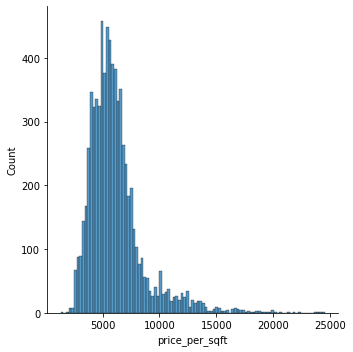

In [96]:
sns.displot(df4.price_per_sqft, kind = 'hist')

In [97]:
df4.bath.unique()

array([ 1.,  3.,  2.,  4.,  5.,  8.,  6., 14.,  7.,  9., 12., 16., 13.])

In [98]:
df4[df4.bath > 10]

,location,total_sqft,bath,price,BHK,price_per_sqft
614,BTM 1st Stage,3300.0,14.0,500.0,9,15151.52
5382,Neeladri Nagar,4000.0,12.0,160.0,10,4000.00
6002,Other,12000.0,12.0,525.0,10,4375.00
6085,Other,10000.0,16.0,550.0,16,5500.00
6762,Other,6000.0,12.0,150.0,11,2500.00
7066,Other,5425.0,13.0,275.0,13,5069.12


In [100]:
df4 = df4[~(df4.bath > df4.BHK + 2)]

In [101]:
df4.shape

(7392, 6)

In [102]:
df4.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Anekal,351.0,1.0,16.0,1,4558.40
1,Banaswadi,527.0,1.0,35.0,1,6641.37
2,Basavangudi,670.0,1.0,50.0,1,7462.69
3,Devarabeesana Halli,1672.0,3.0,150.0,3,8971.29
4,Devarabeesana Halli,1750.0,3.0,149.0,3,8514.29


In [105]:
df4.drop(['price_per_sqft'], axis = 'columns', inplace = True)

In [108]:
dummies = pd.get_dummies(df4.location).drop(['Other'], axis = 'columns')

In [109]:
df5 = pd.concat([df4, dummies], axis = 'columns')

In [112]:
df5.drop(['location'], axis = 'columns', inplace = True)

In [113]:
df5.head()

,total_sqft,bath,price,BHK,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,Electronic City,...,Vittasandra,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur
0,351.0,1.0,16.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,527.0,1.0,35.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,670.0,1.0,50.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1672.0,3.0,150.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,149.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
X = df5.drop(['price'], axis = 'columns')
y = df5.price

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)